<a href="https://colab.research.google.com/github/MachineLearnia/Python-Machine-Learning/blob/master/27%20-%20Exploratory%20Data%20Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999

<IPython.core.display.Javascript object>

## Objectif :
- Comprendre du mieux possible nos données (un petit pas en avant vaut mieux qu'un grand pas en arriere)
- Développer une premiere stratégie de modélisation 

    
# 1. Premiers modèles

##  Régression Linéaire avec 3 variables

##  Test de plusieurs algorithmes de régression
- **LinearRegression** 
- **Lasso** 
- **ElasticNet** 
- **Ridget**
- **SVR**
##  Nouvelles tentatives de régression linéaire

# 2. SVR






In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
pd.set_option('display.max_row', 105)
pd.set_option('display.max_column', 105)

In [44]:
chemin = "../data/X_train_v2.csv"
X = pd.read_csv(chemin, index_col=0, encoding = "ISO-8859-1")

In [45]:
X_WF1 = X[X['WF']=='WF1']
X_WF1.shape

(6239, 104)

In [46]:
y = pd.read_csv('../data/Y_train_sl9m6Jh.csv', index_col=0, encoding = "ISO-8859-1")

In [47]:
X_WF1_indexes = X.index[X['WF']=='WF1']

y_WF1 = y.iloc[X_WF1_indexes] 

### Création des ensembles U, V, T, CLCT

In [48]:
df = X_WF1.copy()
liste_U_columns = [df.columns[i] for i in range (df.shape[1]) if '_U' in df.columns[i]]
X_WF1[liste_U_columns]

,NWP1_00h_D-2_U,NWP1_06h_D-2_U,NWP1_12h_D-2_U,NWP1_18h_D-2_U,NWP1_00h_D-1_U,NWP1_06h_D-1_U,NWP1_12h_D-1_U,NWP1_18h_D-1_U,NWP1_00h_D_U,NWP1_06h_D_U,NWP1_12h_D_U,NWP1_18h_D_U,NWP2_00h_D-2_U,NWP2_12h_D-2_U,NWP2_00h_D-1_U,NWP2_12h_D-1_U,NWP2_00h_D_U,NWP2_12h_D_U,NWP3_00h_D-2_U,NWP3_06h_D-2_U,NWP3_12h_D-2_U,NWP3_18h_D-2_U,NWP3_00h_D-1_U,NWP3_06h_D-1_U,NWP3_12h_D-1_U,NWP3_18h_D-1_U,NWP3_00h_D_U,NWP3_06h_D_U,NWP3_12h_D_U,NWP3_18h_D_U,NWP4_00h_D-2_U,NWP4_12h_D-2_U,NWP4_00h_D-1_U,NWP4_12h_D-1_U,NWP4_00h_D_U,NWP4_12h_D_U
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-2.2485,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.254603,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-2.4345,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.490908,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.3659,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.6117,NaN,-2.953555,-0.098247,3.825605,-1.888967,-5.819939,-5.816164,-3.796250,-1.707402,-1.148957,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.997093,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.7065,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.689598,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.8134,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.290994,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6235,NaN,NaN,0.3473,-1.5473,-1.8275,-1.4071,-2.5989,-3.1709,-1.8757,-2.5780,-3.1851,-2.5467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.183121,0.039735,-0.342881,-0.190785
6236,NaN,NaN,0.2612,-2.2067,-1.9280,-1.2199,-2.6599,-3.0365,-1.8455,-2.7016,-3.4590,-3.0983,NaN,-0.4827,-0.6185,-0.3145,-0.2909,0.3789,NaN,NaN,-0.194377,-1.621111,-1.809436,-1.459817,-1.253218,-1.073533,-1.414258,-1.619402,-1.376663,-1.304119,NaN,NaN,-0.240623,-0.077627,-0.476837,-0.372534
6237,NaN,NaN,0.2305,-2.9508,-2.3704,-1.2968,-2.8425,-3.1156,-2.1601,-2.8080,-3.2082,-3.2611,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.798107,-0.293356,-0.618349,-0.529659


In [49]:
liste_V_columns = [df.columns[i] for i in range (df.shape[1]) if '_V' in df.columns[i]]
X_WF1[liste_V_columns]

,NWP1_00h_D-2_V,NWP1_06h_D-2_V,NWP1_12h_D-2_V,NWP1_18h_D-2_V,NWP1_00h_D-1_V,NWP1_06h_D-1_V,NWP1_12h_D-1_V,NWP1_18h_D-1_V,NWP1_00h_D_V,NWP1_06h_D_V,NWP1_12h_D_V,NWP1_18h_D_V,NWP2_00h_D-2_V,NWP2_12h_D-2_V,NWP2_00h_D-1_V,NWP2_12h_D-1_V,NWP2_00h_D_V,NWP2_12h_D_V,NWP3_00h_D-2_V,NWP3_06h_D-2_V,NWP3_12h_D-2_V,NWP3_18h_D-2_V,NWP3_00h_D-1_V,NWP3_06h_D-1_V,NWP3_12h_D-1_V,NWP3_18h_D-1_V,NWP3_00h_D_V,NWP3_06h_D_V,NWP3_12h_D_V,NWP3_18h_D_V,NWP4_00h_D-2_V,NWP4_12h_D-2_V,NWP4_00h_D-1_V,NWP4_12h_D-1_V,NWP4_00h_D_V,NWP4_12h_D_V
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-3.2578,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.289687,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.4461,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.413370,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-3.0605,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-2.3427,NaN,-2.276936,1.710425,2.892087,0.326177,2.181897,2.222937,-0.853745,-1.460474,-2.274751,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.415138,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-6.2174,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.961441,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-5.4446,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.294963,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6235,NaN,NaN,-8.5346,-7.3751,-7.4787,-7.5982,-7.1385,-5.6166,-7.1469,-7.1942,-6.6765,-7.6859,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-2.572002,-2.360195,-2.369884,-2.347865
6236,NaN,NaN,-8.0914,-6.9415,-7.0114,-6.9701,-6.5888,-4.8666,-7.1370,-6.6609,-5.3216,-6.7763,NaN,-5.7739,-5.4882,-5.9186,-5.9528,-6.6241,NaN,NaN,-4.721924,-2.795649,-2.784792,-2.825068,-2.515771,-3.229900,-3.209033,-3.522192,-3.325686,-3.577566,NaN,NaN,-2.255450,-2.082737,-2.186706,-2.067537
6237,NaN,NaN,-7.5968,-5.9863,-6.9620,-6.8410,-5.2146,-4.4908,-6.7729,-5.5717,-3.5422,-5.2765,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-2.119222,-1.868720,-1.923782,-1.793902


In [50]:
liste_T_columns = [df.columns[i] for i in range (df.shape[1]) if '_T' in df.columns[i]]
X_WF1[liste_T_columns]

,NWP1_00h_D-2_T,NWP1_06h_D-2_T,NWP1_12h_D-2_T,NWP1_18h_D-2_T,NWP1_00h_D-1_T,NWP1_06h_D-1_T,NWP1_12h_D-1_T,NWP1_18h_D-1_T,NWP1_00h_D_T,NWP1_06h_D_T,NWP1_12h_D_T,NWP1_18h_D_T,NWP3_00h_D-2_T,NWP3_06h_D-2_T,NWP3_12h_D-2_T,NWP3_18h_D-2_T,NWP3_00h_D-1_T,NWP3_06h_D-1_T,NWP3_12h_D-1_T,NWP3_18h_D-1_T,NWP3_00h_D_T,NWP3_06h_D_T,NWP3_12h_D_T,NWP3_18h_D_T
ID,,,,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,286.44,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,286.26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,285.75,NaN,NaN,NaN,287.000000,287.000000,286.000000,287.000000,287.000000,287.000000,287.000000,286.000000,286.000000,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,284.78,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,284.46,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6235,NaN,NaN,280.01,279.83,279.64,279.89,280.03,280.60,280.52,280.53,280.46,280.14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6236,NaN,NaN,279.52,279.32,279.19,279.38,279.51,280.18,280.04,280.01,280.05,279.73,NaN,NaN,280.445068,282.199615,282.278870,282.128998,281.989502,281.718506,281.773438,281.862946,281.802429,281.837891
6237,NaN,NaN,279.06,278.92,278.78,278.83,279.18,279.80,279.61,279.67,279.75,279.39,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [51]:
liste_CLCT_columns = [df.columns[i] for i in range (df.shape[1]) if '_CLCT' in df.columns[i]]
X_WF1[liste_CLCT_columns]

,NWP4_00h_D-2_CLCT,NWP4_12h_D-2_CLCT,NWP4_00h_D-1_CLCT,NWP4_12h_D-1_CLCT,NWP4_00h_D_CLCT,NWP4_12h_D_CLCT
ID,,,,,,
1,NaN,NaN,NaN,NaN,82.543144,NaN
2,NaN,NaN,NaN,NaN,99.990844,NaN
3,NaN,NaN,NaN,NaN,98.367235,NaN
4,NaN,NaN,NaN,NaN,94.860604,NaN
5,NaN,NaN,NaN,NaN,95.905879,NaN
...,...,...,...,...,...,...
6235,NaN,NaN,-0.000013,-0.000015,-0.000016,-0.00002
6236,NaN,NaN,-0.000013,-0.000015,-0.000016,-0.00002
6237,NaN,NaN,-0.000013,-0.000015,-0.000016,-0.00002


In [52]:
y = pd.read_csv('../data/Y_train_sl9m6Jh.csv', index_col=0, encoding = "ISO-8859-1")

X_WF1_indexes = X.index[X['WF']=='WF1']

y_WF1 = y.iloc[X_WF1_indexes-1] 

df = X_WF1.copy()

liste_U_columns = [df.columns[i] for i in range (df.shape[1]) if '_U' in df.columns[i]]
liste_V_columns = [df.columns[i] for i in range (df.shape[1]) if '_V' in df.columns[i]]
liste_T_columns = [df.columns[i] for i in range (df.shape[1]) if '_T' in df.columns[i]]
liste_CLCT_columns = [df.columns[i] for i in range (df.shape[1]) if '_CLCT' in df.columns[i]]

y_columns = ['Production']
df = df[liste_U_columns + liste_V_columns + liste_T_columns + liste_CLCT_columns]
df['Production'] = y_WF1

df.head()

,NWP1_00h_D-2_U,NWP1_06h_D-2_U,NWP1_12h_D-2_U,NWP1_18h_D-2_U,NWP1_00h_D-1_U,NWP1_06h_D-1_U,NWP1_12h_D-1_U,NWP1_18h_D-1_U,NWP1_00h_D_U,NWP1_06h_D_U,NWP1_12h_D_U,NWP1_18h_D_U,NWP2_00h_D-2_U,NWP2_12h_D-2_U,NWP2_00h_D-1_U,NWP2_12h_D-1_U,NWP2_00h_D_U,NWP2_12h_D_U,NWP3_00h_D-2_U,NWP3_06h_D-2_U,NWP3_12h_D-2_U,NWP3_18h_D-2_U,NWP3_00h_D-1_U,NWP3_06h_D-1_U,NWP3_12h_D-1_U,NWP3_18h_D-1_U,NWP3_00h_D_U,NWP3_06h_D_U,NWP3_12h_D_U,NWP3_18h_D_U,NWP4_00h_D-2_U,NWP4_12h_D-2_U,NWP4_00h_D-1_U,NWP4_12h_D-1_U,NWP4_00h_D_U,NWP4_12h_D_U,NWP1_00h_D-2_V,NWP1_06h_D-2_V,NWP1_12h_D-2_V,NWP1_18h_D-2_V,NWP1_00h_D-1_V,NWP1_06h_D-1_V,NWP1_12h_D-1_V,NWP1_18h_D-1_V,NWP1_00h_D_V,NWP1_06h_D_V,NWP1_12h_D_V,NWP1_18h_D_V,NWP2_00h_D-2_V,NWP2_12h_D-2_V,NWP2_00h_D-1_V,NWP2_12h_D-1_V,NWP2_00h_D_V,NWP2_12h_D_V,NWP3_00h_D-2_V,NWP3_06h_D-2_V,NWP3_12h_D-2_V,NWP3_18h_D-2_V,NWP3_00h_D-1_V,NWP3_06h_D-1_V,NWP3_12h_D-1_V,NWP3_18h_D-1_V,NWP3_00h_D_V,NWP3_06h_D_V,NWP3_12h_D_V,NWP3_18h_D_V,NWP4_00h_D-2_V,NWP4_12h_D-2_V,NWP4_00h_D-1_V,NWP4_12h_D-1_V,NWP4_00h_D_V,NWP4_12h_D_V,NWP1_00h_D-2_T,NWP1_06h_D-2_T,NWP1_12h_D-2_T,NWP1_18h_D-2_T,NWP1_00h_D-1_T,NWP1_06h_D-1_T,NWP1_12h_D-1_T,NWP1_18h_D-1_T,NWP1_00h_D_T,NWP1_06h_D_T,NWP1_12h_D_T,NWP1_18h_D_T,NWP3_00h_D-2_T,NWP3_06h_D-2_T,NWP3_12h_D-2_T,NWP3_18h_D-2_T,NWP3_00h_D-1_T,NWP3_06h_D-1_T,NWP3_12h_D-1_T,NWP3_18h_D-1_T,NWP3_00h_D_T,NWP3_06h_D_T,NWP3_12h_D_T,NWP3_18h_D_T,NWP4_00h_D-2_CLCT,NWP4_12h_D-2_CLCT,NWP4_00h_D-1_CLCT,NWP4_12h_D-1_CLCT,NWP4_00h_D_CLCT,NWP4_12h_D_CLCT,Production
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-2.2485,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.254603,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-3.2578,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.289687,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,286.44,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,82.543144,NaN,0.02
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-2.4345,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.490908,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.4461,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.413370,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,286.26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99.990844,NaN,0.07
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.3659,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.6117,NaN,-2.953555,-0.098247,3.825605,-1.888967,-5.819939,-5.816164,-3.79625,-1.707402,-1.148957,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.997093,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-3.0605,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-2.3427,NaN,-2.276936,1.710425,2.892087,0.326177,2.181897,2.222937,-0.853745,-1.460474,-2.274751,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.415138,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,285.75,NaN,NaN,NaN,287.0,287.0,286.0,287.0,287.0,287.0,287.0,286.0,286.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.367235,NaN,0.22
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.7065,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.689598,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-6.2174,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.961441,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,284.78,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.860604,NaN,0.39
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.8134,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.290994,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-5.4446,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.294963,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,284.46,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,95.905879,NaN,0.41


# Premiers modèles

## Régression Linéaire avec 3 variables

In [53]:
new_df=df[['NWP3_00h_D_U', 'NWP3_00h_D_V', 'NWP3_00h_D_T','Production']]
new_df=new_df.dropna()
print(new_df.shape)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( new_df.drop('Production', axis=1) ,new_df['Production'] , test_size=0.2, random_state=0)

from sklearn.linear_model import LinearRegression

model_0 = LinearRegression()
model_0.fit(X_train, y_train)
ypred = model_0.predict(X_test)

from CAPE_CNR_metric import CAPE_CNR_function
CAPE_CNR_function(y_test,ypred)

(2080, 4)


85.23827061535533

In [54]:
new_df=df[['NWP4_00h_D_U', 'NWP4_00h_D_V', 'NWP4_00h_D_CLCT','Production']]
new_df=new_df.dropna()
print(new_df.shape)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( new_df.drop('Production', axis=1) ,new_df['Production'] , test_size=0.2, random_state=0)

from sklearn.linear_model import LinearRegression

model_0 = LinearRegression()
model_0.fit(X_train, y_train)
ypred = model_0.predict(X_test)

print(CAPE_CNR_function(y_test,ypred))

pd.DataFrame({'y_test':y_test ,'ypred': ypred})

(6215, 4)
95.74526921116092


,y_test,ypred
ID,,
2259,0.00,1.885185
5054,7.31,4.094705
2739,0.00,2.048830
5661,2.18,1.894962
2166,0.00,1.989571
...,...,...
1054,7.43,4.339501
4443,0.06,2.945287
3889,3.08,2.067480


## Test de plusieurs algorithmes de régression

In [56]:
# IMPORT BIBLIOTHEQUE
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

# DATAFRAME df
X = pd.read_csv("../data/X_train_v2.csv", index_col=0, encoding = "ISO-8859-1")
X_WF1 = X[X['WF']=='WF1']
y = pd.read_csv('../data/Y_train_sl9m6Jh.csv', index_col=0, encoding = "ISO-8859-1")
X_WF1_indexes = X.index[X['WF']=='WF1']
y_WF1 = y.iloc[X_WF1_indexes-1] 
df = X_WF1.copy()
liste_U_columns = [df.columns[i] for i in range (df.shape[1]) if '_U' in df.columns[i]]
liste_V_columns = [df.columns[i] for i in range (df.shape[1]) if '_V' in df.columns[i]]
liste_T_columns = [df.columns[i] for i in range (df.shape[1]) if '_T' in df.columns[i]]
liste_CLCT_columns = [df.columns[i] for i in range (df.shape[1]) if '_CLCT' in df.columns[i]]
y_columns = ['Production']
df = df[liste_U_columns + liste_V_columns + liste_T_columns + liste_CLCT_columns]
df['Production'] = y_WF1

#FONCTIONS DE PREPROCESSING
def imputation(df):
    df = df.fillna(df.median())
    return  df
def feature_engineering(df):
    df = df[df.columns[df.isna().sum()/df.shape[0] <0.9]]
    return df
def preprocessing(df):
    df = feature_engineering(df)
    df = imputation(df)
    X = df.drop('Production', axis=1)
    y = df['Production']
    return X, y

#TRAIN & TEST SET
from sklearn.model_selection import train_test_split
trainset, testset = train_test_split(df, test_size=0.2, random_state=0)
X_train, y_train = preprocessing(trainset)
X_test, y_test = preprocessing(testset)

#IMPORT SKLEARN
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from CAPE_CNR_metric import CAPE_CNR_function
from sklearn.metrics import make_scorer
custom_score = make_scorer (CAPE_CNR_function, greater_is_better=False)

#CREATION DU MODELE
model_1 = make_pipeline(StandardScaler(),LinearRegression())
model_2 = make_pipeline(StandardScaler(), Lasso())
model_3 = make_pipeline(StandardScaler(), ElasticNet())
model_4 = make_pipeline(StandardScaler(), Ridge())
model_5 = make_pipeline(StandardScaler(), SVR())

model_1.fit(X_train, y_train)
ypred = model_1.predict(X_test)
print(f"score de LinearRegression : {CAPE_CNR_function(y_test,ypred)}")

model_2.fit(X_train, y_train)
ypred = model_2.predict(X_test)
print(f"score de Lasso : {CAPE_CNR_function(y_test,ypred)}")

model_3.fit(X_train, y_train)
ypred = model_3.predict(X_test)
print(f"score de ElasticNet : {CAPE_CNR_function(y_test,ypred)}")

model_4.fit(X_train, y_train)
ypred = model_4.predict(X_test)
print(f"score de Ridge : {CAPE_CNR_function(y_test,ypred)}")

model_5.fit(X_train, y_train)
ypred = model_5.predict(X_test)
print(f"score de SVR : {CAPE_CNR_function(y_test,ypred)}")

score de LinearRegression : 85.21940695415275
score de Lasso : 101.18813624808365
score de ElasticNet : 94.33339941178104
score de Ridge : 85.18737793171847
score de SVR : 37.856307677931255


## Nouvelles tentatives de régression linéaire

**RL avec fillna(0)**

In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

X = pd.read_csv("../data/X_train_v2.csv", index_col=0, encoding = "ISO-8859-1")
X_WF1 = X[X['WF']=='WF1']
y = pd.read_csv('../data/Y_train_sl9m6Jh.csv', index_col=0, encoding = "ISO-8859-1")
X_WF1_indexes = X.index[X['WF']=='WF1']
y_WF1 = y.iloc[X_WF1_indexes-1] 
df = X_WF1.copy()
liste_U_columns = [df.columns[i] for i in range (df.shape[1]) if '_U' in df.columns[i]]
liste_V_columns = [df.columns[i] for i in range (df.shape[1]) if '_V' in df.columns[i]]
liste_T_columns = [df.columns[i] for i in range (df.shape[1]) if '_T' in df.columns[i]]
liste_CLCT_columns = [df.columns[i] for i in range (df.shape[1]) if '_CLCT' in df.columns[i]]
y_columns = ['Production']
df = df[liste_U_columns + liste_V_columns + liste_T_columns + liste_CLCT_columns]
df['Production'] = y_WF1
new_df = df[['NWP1_00h_D_U','NWP1_00h_D_V', 'NWP1_00h_D_T','NWP2_00h_D_V','NWP2_00h_D_U','NWP4_00h_D_V','NWP4_00h_D_U','NWP4_00h_D_CLCT','Production']]

from sklearn.model_selection import train_test_split
trainset, testset = train_test_split(new_df, test_size=0.2, random_state=0)

def imputation(df):
    df = df.fillna(0)
    return  df
def feature_engineering(df):
    df = df[df.columns[df.isna().sum()/df.shape[0] <0.9]]
    return df
def preprocessing(df):
    df = feature_engineering(df)
    df = imputation(df)
    X = df.drop('Production', axis=1)
    y = df['Production']
    return X, y

X_train, y_train = preprocessing(trainset)
X_test, y_test = preprocessing(testset)

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest, f_regression
from CAPE_CNR_metric import CAPE_CNR_function
from sklearn.metrics import make_scorer
custom_score = make_scorer (CAPE_CNR_function, greater_is_better=False)
from sklearn.model_selection import learning_curve
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

def evaluation(model):
    model.fit(X_train, y_train)
    ypred = model.predict(X_test)
    N, train_score, val_score = learning_curve(model, X_train, y_train,
                                              cv=4, scoring=custom_score,
                                               train_sizes=np.linspace(0.1, 1, 10))
    plt.figure(figsize=(12, 8))
    plt.plot(N, train_score.mean(axis=1), label='train score')
    plt.plot(N, val_score.mean(axis=1), label='validation score')
    plt.legend()


model = make_pipeline(StandardScaler(),LinearRegression())
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print(f"score de RL : {CAPE_CNR_function(y_test,y_pred)}")

score de RL : 89.47672308461354


**RL avec fillna(df.median())**

In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

X = pd.read_csv("../data/X_train_v2.csv", index_col=0, encoding = "ISO-8859-1")
X_WF1 = X[X['WF']=='WF1']
y = pd.read_csv('../data/Y_train_sl9m6Jh.csv', index_col=0, encoding = "ISO-8859-1")
X_WF1_indexes = X.index[X['WF']=='WF1']
y_WF1 = y.iloc[X_WF1_indexes-1] 
df = X_WF1.copy()
liste_U_columns = [df.columns[i] for i in range (df.shape[1]) if '_U' in df.columns[i]]
liste_V_columns = [df.columns[i] for i in range (df.shape[1]) if '_V' in df.columns[i]]
liste_T_columns = [df.columns[i] for i in range (df.shape[1]) if '_T' in df.columns[i]]
liste_CLCT_columns = [df.columns[i] for i in range (df.shape[1]) if '_CLCT' in df.columns[i]]
y_columns = ['Production']
df = df[liste_U_columns + liste_V_columns + liste_T_columns + liste_CLCT_columns]
df['Production'] = y_WF1
new_df = df[['NWP1_00h_D_U','NWP1_00h_D_V', 'NWP1_00h_D_T','NWP2_00h_D_V','NWP2_00h_D_U','NWP4_00h_D_V','NWP4_00h_D_U','NWP4_00h_D_CLCT','Production']]

from sklearn.model_selection import train_test_split
trainset, testset = train_test_split(new_df, test_size=0.2, random_state=0)

def imputation(df):
    df = df.fillna(df.median())
    return  df
def feature_engineering(df):
    df = df[df.columns[df.isna().sum()/df.shape[0] <0.9]]
    return df
def preprocessing(df):
    df = feature_engineering(df)
    df = imputation(df)
    X = df.drop('Production', axis=1)
    y = df['Production']
    return X, y

X_train, y_train = preprocessing(trainset)
X_test, y_test = preprocessing(testset)

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest, f_regression
from CAPE_CNR_metric import CAPE_CNR_function
from sklearn.metrics import make_scorer
custom_score = make_scorer (CAPE_CNR_function, greater_is_better=False)
from sklearn.model_selection import learning_curve
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

def evaluation(model):
    model.fit(X_train, y_train)
    ypred = model.predict(X_test)
    N, train_score, val_score = learning_curve(model, X_train, y_train,
                                              cv=4, scoring=custom_score,
                                               train_sizes=np.linspace(0.1, 1, 10))
    plt.figure(figsize=(12, 8))
    plt.plot(N, train_score.mean(axis=1), label='train score')
    plt.plot(N, val_score.mean(axis=1), label='validation score')
    plt.legend()


model = make_pipeline(StandardScaler(),LinearRegression())
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print(f"score de RL : {CAPE_CNR_function(y_test,y_pred)}")

score de RL : 89.45449628102125


RL avec GridSearchCV

{'selectkbest__k': 5}
score de RL : 89.20357937280347


<Axes: >

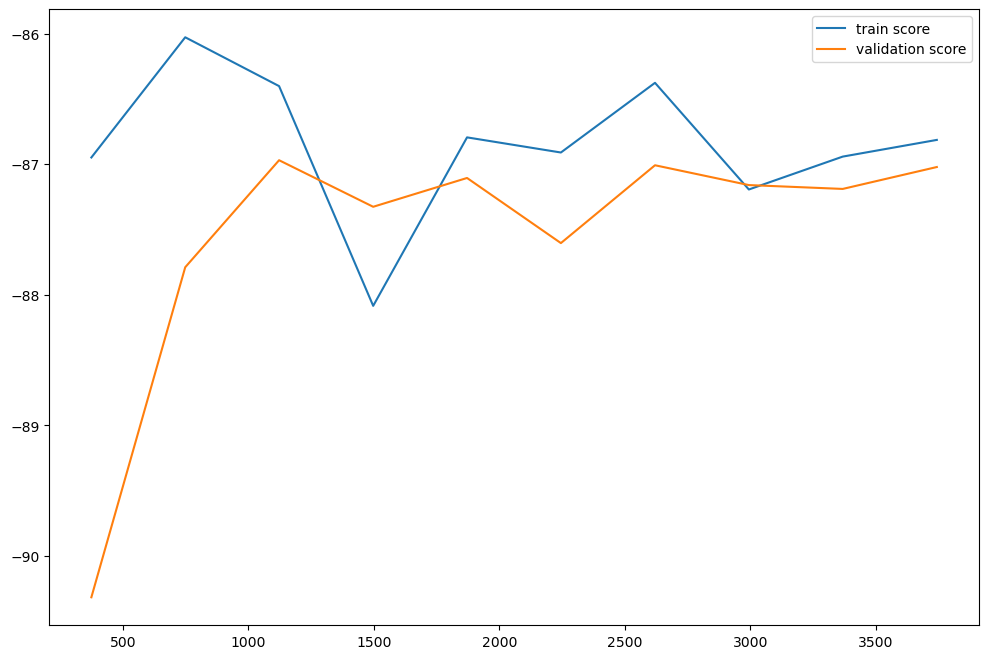

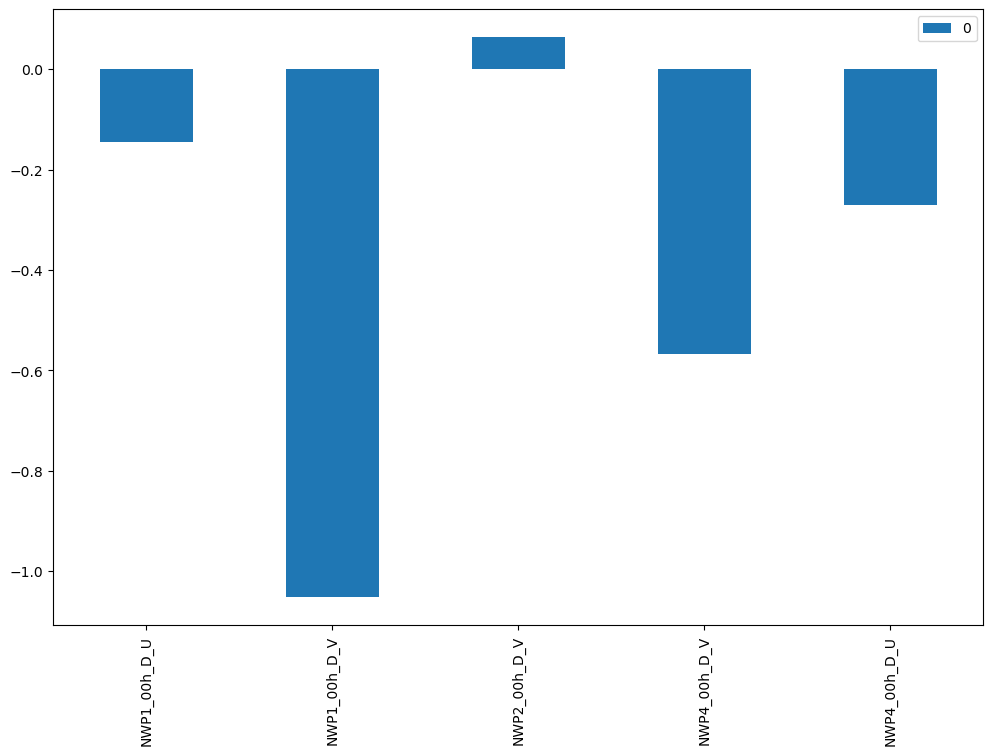

In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

X = pd.read_csv("../data/X_train_v2.csv", index_col=0, encoding = "ISO-8859-1")
X_WF1 = X[X['WF']=='WF1']
y = pd.read_csv('../data/Y_train_sl9m6Jh.csv', index_col=0, encoding = "ISO-8859-1")
X_WF1_indexes = X.index[X['WF']=='WF1']
y_WF1 = y.iloc[X_WF1_indexes-1] 
df = X_WF1.copy()
liste_U_columns = [df.columns[i] for i in range (df.shape[1]) if '_U' in df.columns[i]]
liste_V_columns = [df.columns[i] for i in range (df.shape[1]) if '_V' in df.columns[i]]
liste_T_columns = [df.columns[i] for i in range (df.shape[1]) if '_T' in df.columns[i]]
liste_CLCT_columns = [df.columns[i] for i in range (df.shape[1]) if '_CLCT' in df.columns[i]]
y_columns = ['Production']
df = df[liste_U_columns + liste_V_columns + liste_T_columns + liste_CLCT_columns]
df['Production'] = y_WF1
new_df = df[['NWP1_00h_D_U','NWP1_00h_D_V', 'NWP1_00h_D_T','NWP2_00h_D_V','NWP2_00h_D_U','NWP4_00h_D_V','NWP4_00h_D_U','NWP4_00h_D_CLCT','Production']]

from sklearn.model_selection import train_test_split
trainset, testset = train_test_split(new_df, test_size=0.2, random_state=0)

def imputation(df):
    df = df.fillna(0)
    return  df
def feature_engineering(df):
    df = df[df.columns[df.isna().sum()/df.shape[0] <0.9]]
    return df
def preprocessing(df):
    df = feature_engineering(df)
    df = imputation(df)
    X = df.drop('Production', axis=1)
    y = df['Production']
    return X, y

X_train, y_train = preprocessing(trainset)
X_test, y_test = preprocessing(testset)

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest, f_regression
from CAPE_CNR_metric import CAPE_CNR_function
from sklearn.metrics import make_scorer
custom_score = make_scorer (CAPE_CNR_function, greater_is_better=False)
from sklearn.model_selection import learning_curve
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

def evaluation(model):
    model.fit(X_train, y_train)
    ypred = model.predict(X_test)
    N, train_score, val_score = learning_curve(model, X_train, y_train,
                                              cv=4, scoring=custom_score,
                                               train_sizes=np.linspace(0.1, 1, 10))
    plt.figure(figsize=(12, 8))
    plt.plot(N, train_score.mean(axis=1), label='train score')
    plt.plot(N, val_score.mean(axis=1), label='validation score')
    plt.legend()


model_1 = make_pipeline(StandardScaler(),SelectKBest(f_regression, k=10),LinearRegression())

hyper_params = {'selectkbest__k':[i for i in range(4,X_test.shape[1])]}
grid = GridSearchCV(model_1, hyper_params, scoring=custom_score, cv=4)
grid.fit(X_train, y_train)
print(grid.best_params_)

y_pred = grid.predict(X_test)
print(f"score de RL : {CAPE_CNR_function(y_test,y_pred)}")

evaluation(grid.best_estimator_)
pd.DataFrame(grid.best_estimator_[2].coef_, index=X_train.columns[grid.best_estimator_[1].get_support()]).plot.bar(figsize=(12, 8))

**RL avec Random Forest pour remplir les NaN**

/var/folders/j1/7qnbs1wj3p3_8x_mtqwtgtlh0000gn/T/ipykernel_6436/59624856.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df[cols_without_missing]= new_df[cols_without_missing].fillna(0)


{'selectkbest__k': 7}
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('selectkbest',
                 SelectKBest(k=7,
                             score_func=<function f_regression at 0x7fe6f32a3b50>)),
                ('linearregression', LinearRegression())])


<Axes: >

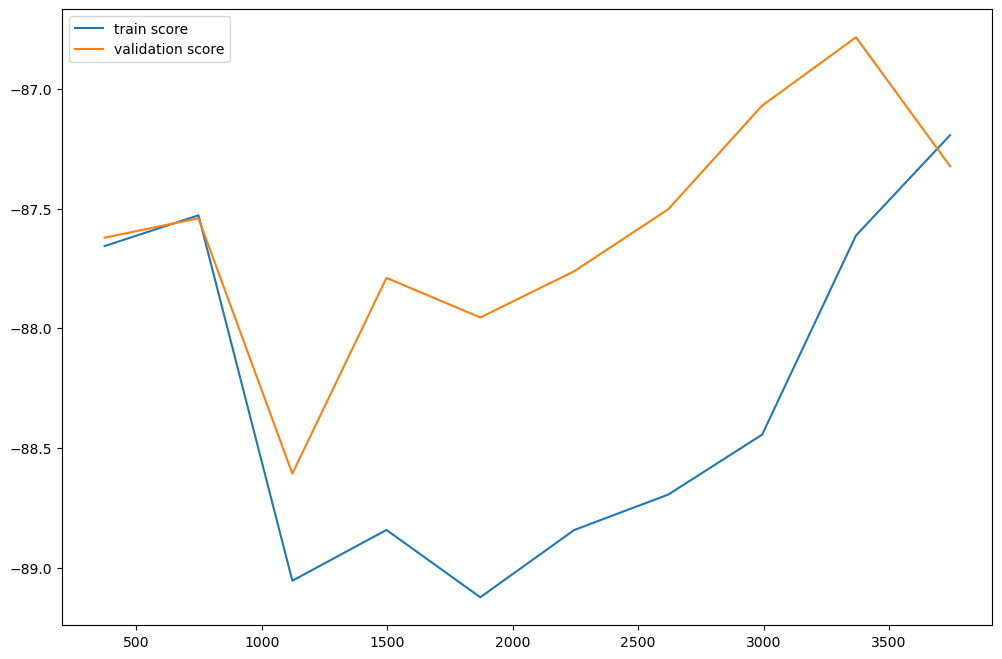

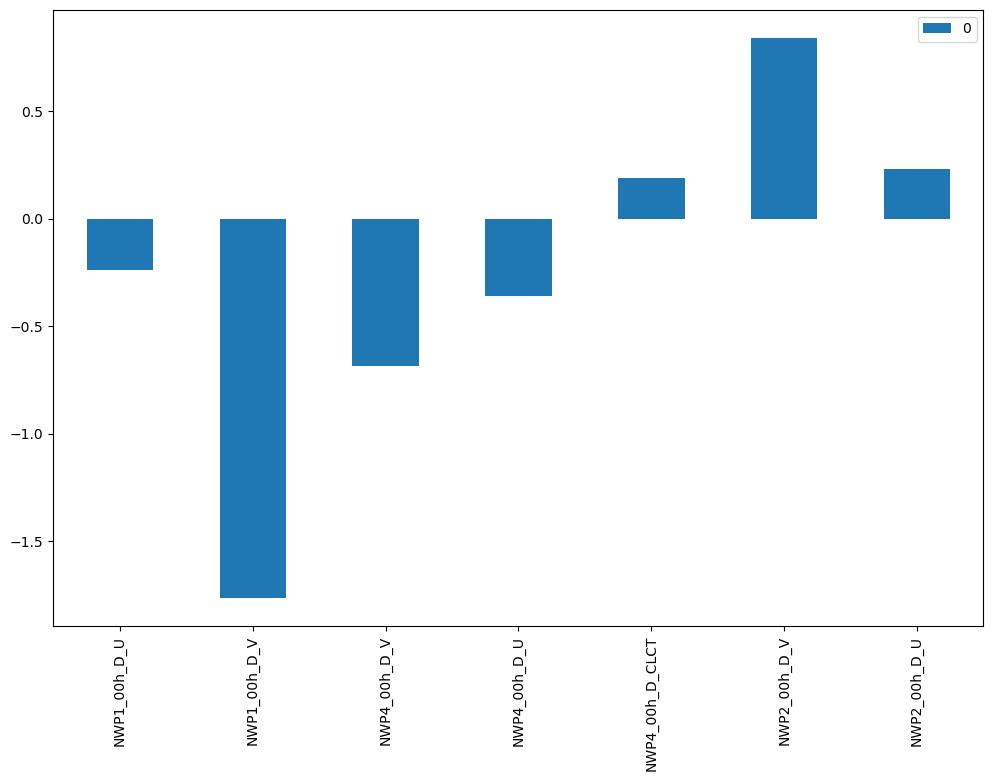

In [60]:
X = pd.read_csv("../data/X_train_v2.csv", index_col=0, encoding = "ISO-8859-1")
X_WF1 = X[X['WF']=='WF1']
y = pd.read_csv('../data/Y_train_sl9m6Jh.csv', index_col=0, encoding = "ISO-8859-1")
X_WF1_indexes = X.index[X['WF']=='WF1']
y_WF1 = y.iloc[X_WF1_indexes-1] 
df = X_WF1.copy()
liste_U_columns = [df.columns[i] for i in range (df.shape[1]) if '_U' in df.columns[i]]
liste_V_columns = [df.columns[i] for i in range (df.shape[1]) if '_V' in df.columns[i]]
liste_T_columns = [df.columns[i] for i in range (df.shape[1]) if '_T' in df.columns[i]]
liste_CLCT_columns = [df.columns[i] for i in range (df.shape[1]) if '_CLCT' in df.columns[i]]
y_columns = ['Production']
df = df[liste_U_columns + liste_V_columns + liste_T_columns + liste_CLCT_columns]
df['Production'] = y_WF1

from sklearn.ensemble import RandomForestRegressor
# Initialiser l'objet RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, random_state=0)
new_df = df[['NWP1_00h_D_U','NWP1_00h_D_V', 'NWP1_00h_D_T','NWP4_00h_D_V','NWP4_00h_D_U','NWP4_00h_D_CLCT','NWP2_00h_D_V','NWP2_00h_D_U']]
# Séparer les colonnes en celles contenant des valeurs manquantes et celles qui ne le font pas
cols_with_missing = ['NWP2_00h_D_V','NWP2_00h_D_U']
cols_without_missing = ['NWP1_00h_D_U','NWP1_00h_D_V', 'NWP1_00h_D_T','NWP4_00h_D_V','NWP4_00h_D_U','NWP4_00h_D_CLCT']
new_df[cols_without_missing]= new_df[cols_without_missing].fillna(0)
df_train = new_df[new_df['NWP2_00h_D_V'].notnull()]
df_train = new_df[new_df['NWP2_00h_D_U'].notnull()]
df_test = new_df[new_df['NWP2_00h_D_V'].isna()]
df_test = new_df[new_df['NWP2_00h_D_U'].isna()]
# Séparer les données en celles d'entraînement et de test
X_train = df_train[cols_without_missing]
y_train = df_train[cols_with_missing]
# Entraîner le modèle sur les données d'entraînement
rf.fit(X_train, y_train)
# # Prédire les valeurs manquantes
X_test = df_test[cols_without_missing]
y_test = rf.predict(X_test)
# Remplir les valeurs manquantes
df_filled = df_test.copy()
df_filled[cols_with_missing] = y_test
df_vertical = pd.concat([df_train, df_filled], axis=0)
df_vertical['Production'] = y_WF1

from sklearn.model_selection import train_test_split
trainset, testset = train_test_split(df_vertical, test_size=0.2, random_state=0)

def imputation(df):
    df = df.fillna(0)
    return  df
def feature_engineering(df):
    df = df[df.columns[df.isna().sum()/df.shape[0] <0.9]]
    return df
def preprocessing(df):
    df = feature_engineering(df)
    df = imputation(df)
    X = df.drop('Production', axis=1)
    y = df['Production']
    return X, y

X_train, y_train = preprocessing(trainset)
X_test, y_test = preprocessing(testset)

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest, f_regression
from CAPE_CNR_metric import CAPE_CNR_function
from sklearn.metrics import make_scorer
custom_score = make_scorer (CAPE_CNR_function, greater_is_better=False)
from sklearn.model_selection import learning_curve
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

def evaluation(model):
    model.fit(X_train, y_train)
    ypred = model.predict(X_test)
    N, train_score, val_score = learning_curve(model, X_train, y_train,
                                              cv=4, scoring=custom_score,
                                               train_sizes=np.linspace(0.1, 1, 10))

    print(model)
    plt.figure(figsize=(12, 8))
    plt.plot(N, train_score.mean(axis=1), label='train score')
    plt.plot(N, val_score.mean(axis=1), label='validation score')
    plt.legend()

model_1 = make_pipeline(StandardScaler(),SelectKBest(f_regression, k=10),LinearRegression())
hyper_params = {'selectkbest__k':[i for i in range(4,X_test.shape[1])]}
grid = GridSearchCV(model_1, hyper_params, scoring=custom_score, cv=4)
grid.fit(X_train, y_train)
print(grid.best_params_)
y_pred = grid.predict(X_test)
evaluation(grid.best_estimator_)

pd.DataFrame(grid.best_estimator_[2].coef_, index=X_train.columns[grid.best_estimator_[1].get_support()]).plot.bar(figsize=(12, 8))

## Support Vector Regression

**SVR** 

37.856307677931255
Pipeline(steps=[('standardscaler', StandardScaler()), ('svr', SVR())])


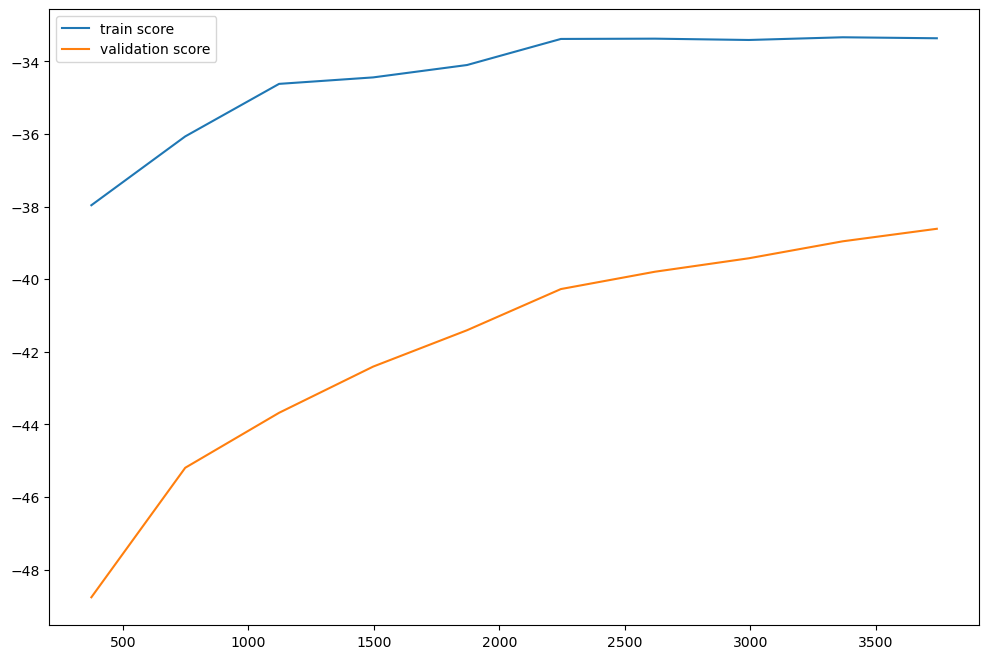

In [61]:
# IMPORT BIBLIOTHEQUE
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

# DATAFRAME df
X = pd.read_csv("../data/X_train_v2.csv", index_col=0, encoding = "ISO-8859-1")
X_WF1 = X[X['WF']=='WF1']
y = pd.read_csv('../data/Y_train_sl9m6Jh.csv', index_col=0, encoding = "ISO-8859-1")
X_WF1_indexes = X.index[X['WF']=='WF1']
y_WF1 = y.iloc[X_WF1_indexes-1] 
df = X_WF1.copy()
liste_U_columns = [df.columns[i] for i in range (df.shape[1]) if '_U' in df.columns[i]]
liste_V_columns = [df.columns[i] for i in range (df.shape[1]) if '_V' in df.columns[i]]
liste_T_columns = [df.columns[i] for i in range (df.shape[1]) if '_T' in df.columns[i]]
liste_CLCT_columns = [df.columns[i] for i in range (df.shape[1]) if '_CLCT' in df.columns[i]]
y_columns = ['Production']
df = df[liste_U_columns + liste_V_columns + liste_T_columns + liste_CLCT_columns]
df['Production'] = y_WF1

#FONCTIONS DE PREPROCESSING
def imputation(df):
    df = df.fillna(df.median())
    return  df
def feature_engineering(df):
    df = df[df.columns[df.isna().sum()/df.shape[0] <0.9]]
    return df
def preprocessing(df):
    df = feature_engineering(df)
    df = imputation(df)
    X = df.drop('Production', axis=1)
    y = df['Production']
    return X, y

#TRAIN&TEST SET
from sklearn.model_selection import train_test_split
trainset, testset = train_test_split(df, test_size=0.2, random_state=0)
X_train, y_train = preprocessing(trainset)
X_test, y_test = preprocessing(testset)


#IMPORT SKLEARN
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from CAPE_CNR_metric import CAPE_CNR_function
from sklearn.metrics import make_scorer
custom_score = make_scorer (CAPE_CNR_function, greater_is_better=False)
from sklearn.model_selection import learning_curve
from sklearn.model_selection import cross_val_score

def evaluation(model):
    model.fit(X_train, y_train)
    ypred = model.predict(X_test)
    N, train_score, val_score = learning_curve(model, X_train, y_train,
                                              cv=4, scoring=custom_score,
                                               train_sizes=np.linspace(0.1, 1, 10))
    print(model)
    plt.figure(figsize=(12, 8))
    plt.plot(N, train_score.mean(axis=1), label='train score')
    plt.plot(N, val_score.mean(axis=1), label='validation score')
    plt.legend()

#CREATION DU MODELE
model_1 = make_pipeline(StandardScaler(),SVR())
model_1.fit(X_train,y_train)
ypred = model_1.predict(X_test)
print(CAPE_CNR_function(y_test,ypred))

#EVALUATION
evaluation(model_1)


Meilleurs paramètres: {'svr__C': 10, 'svr__gamma': 0.01}
34.76631499212397
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svr', SVR(C=10, gamma=0.01))])


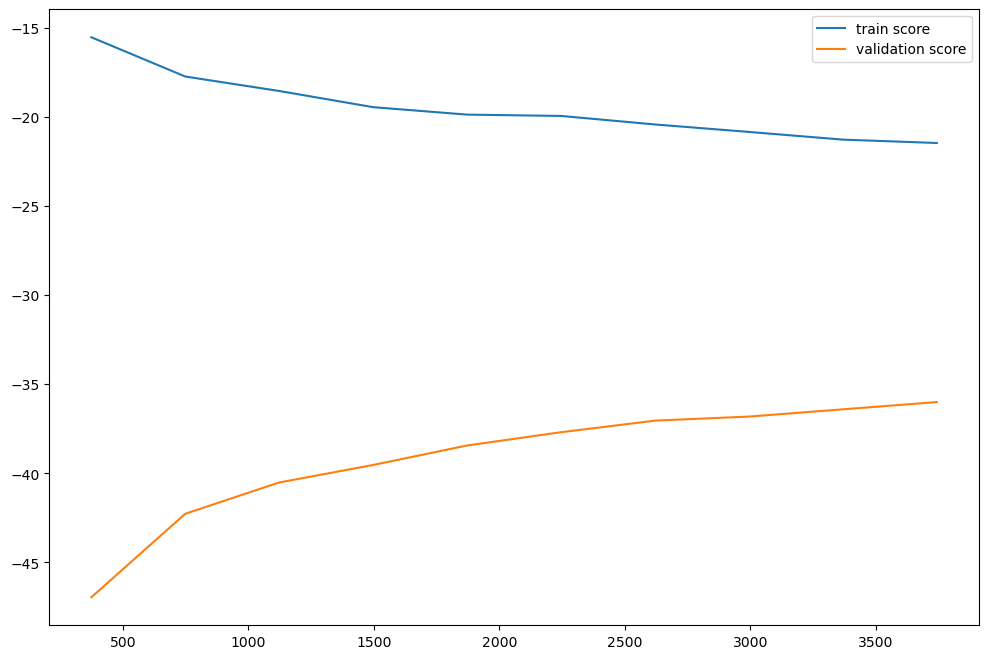

In [62]:
# IMPORT BIBLIOTHEQUE
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

# DATAFRAME df
X = pd.read_csv("../data/X_train_v2.csv", index_col=0, encoding = "ISO-8859-1")
X_WF1 = X[X['WF']=='WF1']
y = pd.read_csv('../data/Y_train_sl9m6Jh.csv', index_col=0, encoding = "ISO-8859-1")
X_WF1_indexes = X.index[X['WF']=='WF1']
y_WF1 = y.iloc[X_WF1_indexes-1] 
df = X_WF1.copy()
liste_U_columns = [df.columns[i] for i in range (df.shape[1]) if '_U' in df.columns[i]]
liste_V_columns = [df.columns[i] for i in range (df.shape[1]) if '_V' in df.columns[i]]
liste_T_columns = [df.columns[i] for i in range (df.shape[1]) if '_T' in df.columns[i]]
liste_CLCT_columns = [df.columns[i] for i in range (df.shape[1]) if '_CLCT' in df.columns[i]]
y_columns = ['Production']
df = df[liste_U_columns + liste_V_columns + liste_T_columns + liste_CLCT_columns]
df['Production'] = y_WF1

#FONCTIONS DE PREPROCESSING
def imputation(df):
    df = df.fillna(df.median())
    return  df
def feature_engineering(df):
    df = df[df.columns[df.isna().sum()/df.shape[0] <0.9]]
    return df
def preprocessing(df):
    df = feature_engineering(df)
    df = imputation(df)
    X = df.drop('Production', axis=1)
    y = df['Production']
    return X, y

#TRAIN&TEST SET
from sklearn.model_selection import train_test_split
trainset, testset = train_test_split(df, test_size=0.2, random_state=0)
X_train, y_train = preprocessing(trainset)
X_test, y_test = preprocessing(testset)


#IMPORT SKLEARN
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from CAPE_CNR_metric import CAPE_CNR_function
from sklearn.metrics import make_scorer
custom_score = make_scorer (CAPE_CNR_function, greater_is_better=False)
from sklearn.model_selection import learning_curve
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

def evaluation(model):
    model.fit(X_train, y_train)
    ypred = model.predict(X_test)
    N, train_score, val_score = learning_curve(model, X_train, y_train,
                                              cv=4, scoring=custom_score,
                                               train_sizes=np.linspace(0.1, 1, 10))
    print(model)
    plt.figure(figsize=(12, 8))
    plt.plot(N, train_score.mean(axis=1), label='train score')
    plt.plot(N, val_score.mean(axis=1), label='validation score')
    plt.legend()

#CREATION DU MODELE
model_1 = make_pipeline(StandardScaler(),SVR())

#GRIDSEARCHCV
param_grid = {'svr__C': [0.1, 1, 10], 'svr__gamma': [0.01, 0.1, 1]}
grid_search = GridSearchCV(model_1, param_grid, cv=5, scoring=custom_score)
grid_search.fit(X_train, y_train)
print("Meilleurs paramètres:", grid_search.best_params_)

grid_search.best_estimator_.fit(X_train,y_train)
ypred = grid_search.best_estimator_.predict(X_test)
print(CAPE_CNR_function(y_test,ypred))

#EVALUATION
evaluation(grid_search.best_estimator_)

**SVR RandomizedSearchCV**

In [ ]:
# IMPORT BIBLIOTHEQUE
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

# DATAFRAME df
X = pd.read_csv("../data/X_train_v2.csv", index_col=0, encoding = "ISO-8859-1")
X_WF1 = X[X['WF']=='WF1']
y = pd.read_csv('../data/Y_train_sl9m6Jh.csv', index_col=0, encoding = "ISO-8859-1")
X_WF1_indexes = X.index[X['WF']=='WF1']
y_WF1 = y.iloc[X_WF1_indexes-1] 
df = X_WF1.copy()
liste_U_columns = [df.columns[i] for i in range (df.shape[1]) if '_U' in df.columns[i]]
liste_V_columns = [df.columns[i] for i in range (df.shape[1]) if '_V' in df.columns[i]]
liste_T_columns = [df.columns[i] for i in range (df.shape[1]) if '_T' in df.columns[i]]
liste_CLCT_columns = [df.columns[i] for i in range (df.shape[1]) if '_CLCT' in df.columns[i]]
y_columns = ['Production']
df = df[liste_U_columns + liste_V_columns + liste_T_columns + liste_CLCT_columns]
df['Production'] = y_WF1

#FONCTIONS DE PREPROCESSING
def imputation(df):
    df = df.fillna(df.median())
    return  df
def feature_engineering(df):
    df = df[df.columns[df.isna().sum()/df.shape[0] <0.9]]
    return df
def preprocessing(df):
    df = feature_engineering(df)
    df = imputation(df)
    X = df.drop('Production', axis=1)
    y = df['Production']
    return X, y

#TRAIN&TEST SET
from sklearn.model_selection import train_test_split
trainset, testset = train_test_split(df, test_size=0.2, random_state=0)
X_train, y_train = preprocessing(trainset)
X_test, y_test = preprocessing(testset)


#IMPORT SKLEARN
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from CAPE_CNR_metric import CAPE_CNR_function
from sklearn.metrics import make_scorer
custom_score = make_scorer (CAPE_CNR_function, greater_is_better=False)
from sklearn.model_selection import learning_curve
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV

def evaluation(model):
    model.fit(X_train, y_train)
    ypred = model.predict(X_test)
    N, train_score, val_score = learning_curve(model, X_train, y_train,
                                              cv=4, scoring=custom_score,
                                               train_sizes=np.linspace(0.1, 1, 10))
    print(model)
    plt.figure(figsize=(12, 8))
    plt.plot(N, train_score.mean(axis=1), label='train score')
    plt.plot(N, val_score.mean(axis=1), label='validation score')
    plt.legend()

#CREATION DU MODELE
model_1 = make_pipeline(StandardScaler(),SVR())

#RANDOMIZEDSEARCHCV

param_grid = {'svr__C': np.logspace(-3, 3, 64),
              'svr__gamma': np.logspace(-3, 3, 64)}
n_iter = 5
best_params=[]

for i in range(n_iter):
    print(f"Itération n°{i+1}")
    print("Espace des paramètres : ", param_grid)
    random_search = RandomizedSearchCV(model_1, param_grid, n_iter=10, cv=5, scoring=custom_score)
    random_search.fit(X_train, y_train)
    print("Meilleurs paramètres : ", random_search.best_params_)
    best_params.append(random_search.best_params_)
    if i == 0:
        continue
    # Réduire l'espace de recherche pour les paramètres les plus prometteurs
    c_width = (best_params[-1]["svr__C"] - best_params[-2]["svr__C"]) / 2
    gamma_width = (best_params[-1]["svr__gamma"] - best_params[-2]["svr__gamma"]) / 2
    param_grid= {
    "svr__C": np.arange(
        best_params[-1]["svr__C"] - c_width,
        best_params[-1]["svr__C"] + c_width,
        c_width/2),
    "svr__gamma":np.arange(
        best_params[-1]["svr__gamma"] - gamma_width,
        best_params[-1]["svr__gamma"] + gamma_width,
        gamma_width/2)}

# {'svr__gamma': 0.006413977468342062, 'svr__C': 200.96393567776602}


Itération n°1
Espace des paramètres :  {'svr__C': array([1.00000000e-03, 1.24519708e-03, 1.55051578e-03, 1.93069773e-03,
       2.40409918e-03, 2.99357729e-03, 3.72759372e-03, 4.64158883e-03,
       5.77969288e-03, 7.19685673e-03, 8.96150502e-03, 1.11588399e-02,
       1.38949549e-02, 1.73019574e-02, 2.15443469e-02, 2.68269580e-02,
       3.34048498e-02, 4.15956216e-02, 5.17947468e-02, 6.44946677e-02,
       8.03085722e-02, 1.00000000e-01, 1.24519708e-01, 1.55051578e-01,
       1.93069773e-01, 2.40409918e-01, 2.99357729e-01, 3.72759372e-01,
       4.64158883e-01, 5.77969288e-01, 7.19685673e-01, 8.96150502e-01,
       1.11588399e+00, 1.38949549e+00, 1.73019574e+00, 2.15443469e+00,
       2.68269580e+00, 3.34048498e+00, 4.15956216e+00, 5.17947468e+00,
       6.44946677e+00, 8.03085722e+00, 1.00000000e+01, 1.24519708e+01,
       1.55051578e+01, 1.93069773e+01, 2.40409918e+01, 2.99357729e+01,
       3.72759372e+01, 4.64158883e+01, 5.77969288e+01, 7.19685673e+01,
       8.96150502e+01, 1.11

In [ ]:
model = make_pipeline(StandardScaler(),SVR(C=200.96393567776602, gamma = 0.006413977468342062))
model.fit(X_train, y_train)
ypred = model.predict(X_test)
CAPE_CNR_function(y_test,ypred)


36.88637320430212

48.26643019134444
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])


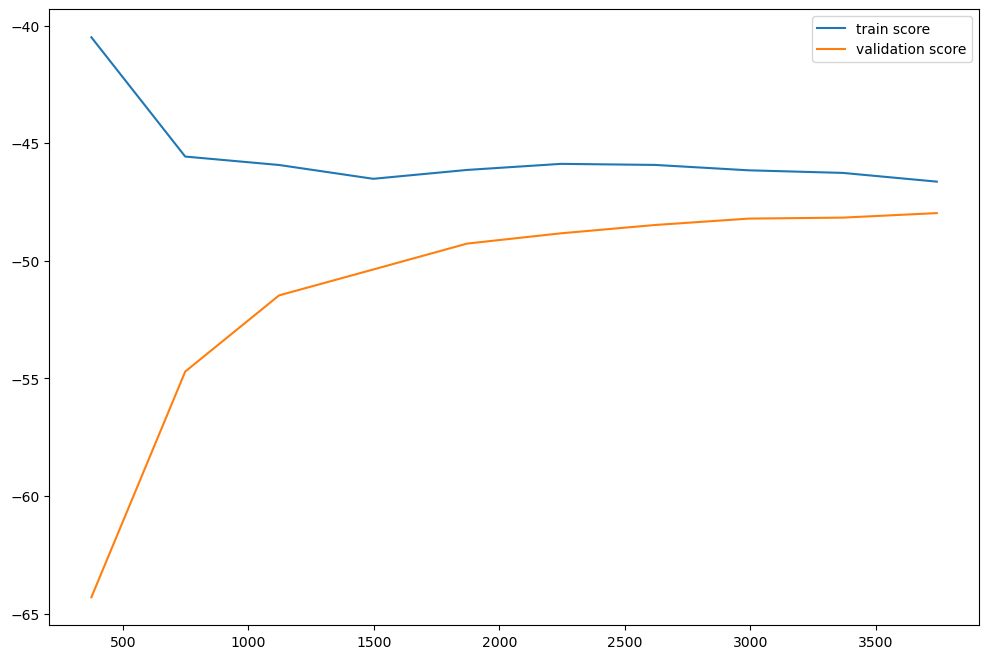

In [63]:
# IMPORT BIBLIOTHEQUE
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

# DATAFRAME df
X = pd.read_csv("../data/X_train_v2.csv", index_col=0, encoding = "ISO-8859-1")
X_WF1 = X[X['WF']=='WF1']
y = pd.read_csv('../data/Y_train_sl9m6Jh.csv', index_col=0, encoding = "ISO-8859-1")
X_WF1_indexes = X.index[X['WF']=='WF1']
y_WF1 = y.iloc[X_WF1_indexes-1] 
df = X_WF1.copy()
liste_U_columns = [df.columns[i] for i in range (df.shape[1]) if '_U' in df.columns[i]]
liste_V_columns = [df.columns[i] for i in range (df.shape[1]) if '_V' in df.columns[i]]
liste_T_columns = [df.columns[i] for i in range (df.shape[1]) if '_T' in df.columns[i]]
liste_CLCT_columns = [df.columns[i] for i in range (df.shape[1]) if '_CLCT' in df.columns[i]]
y_columns = ['Production']
df = df[liste_U_columns + liste_V_columns + liste_T_columns + liste_CLCT_columns]
df['Production'] = y_WF1

#Creation de la variable WindSpeed WS
WS = pd.DataFrame()
dico = dict(zip(liste_V_columns,liste_U_columns))
for key, value in dico.items():
    WS[key] = np.sqrt(df[key]**2+df[value]**2)
liste_WS_columns=[]
for elem in list(WS.columns):
    new_elem = elem.replace("_V","_WS")
    liste_WS_columns.append(new_elem)
WS.columns = liste_WS_columns

#Creation de la variable WindDir WD
WD = pd.DataFrame()
dico = dict(zip(liste_V_columns,liste_U_columns))
for key, value in dico.items():
    WD[key] = (270-np.arctan2(df[value],df[key])*180/np.pi)%360 

liste_WD_columns=[]
for elem in list(WD.columns):
    new_elem = elem.replace("_V","_WD")
    liste_WD_columns.append(new_elem)
WD.columns = liste_WD_columns

#FONCTIONS DE PREPROCESSING
def imputation(df):
    df = df.fillna(df.median())
    return  df
def feature_engineering(df):
    df = df.drop(liste_U_columns, axis=1)
    df = df.drop(liste_V_columns, axis=1)
    df[liste_WS_columns] = WS
    df[liste_WD_columns] = WD
    df = df[df.columns[df.isna().sum()/df.shape[0] <0.9]]
    return df
feature_engineering(df)
def preprocessing(df):
    df = feature_engineering(df)
    df = imputation(df)
    X = df.drop('Production', axis=1)
    y = df['Production']
    return X, y

#TRAIN&TEST SET
from sklearn.model_selection import train_test_split
trainset, testset = train_test_split(df, test_size=0.2, random_state=0)
X_train, y_train = preprocessing(trainset)
X_test, y_test = preprocessing(testset)


#IMPORT SKLEARN
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from CAPE_CNR_metric import CAPE_CNR_function
from sklearn.metrics import make_scorer
custom_score = make_scorer (CAPE_CNR_function, greater_is_better=False)
from sklearn.model_selection import learning_curve
from sklearn.model_selection import cross_val_score


def evaluation(model):
    model.fit(X_train, y_train)
    ypred = model.predict(X_test)
    N, train_score, val_score = learning_curve(model, X_train, y_train,
                                              cv=4, scoring=custom_score,
                                               train_sizes=np.linspace(0.1, 1, 10))
    print(model)
    plt.figure(figsize=(12, 8))
    plt.plot(N, train_score.mean(axis=1), label='train score')
    plt.plot(N, val_score.mean(axis=1), label='validation score')
    plt.legend()

#CREATION DU MODELE
model_1 = make_pipeline(StandardScaler(),LinearRegression())
model_1.fit(X_train, y_train)
ypred = model_1.predict(X_test)
print(CAPE_CNR_function(y_test,ypred))

evaluation(model_1)



40.46853357306404
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svr', SVR(C=200.96393567776602, gamma=0.006413977468342062))])


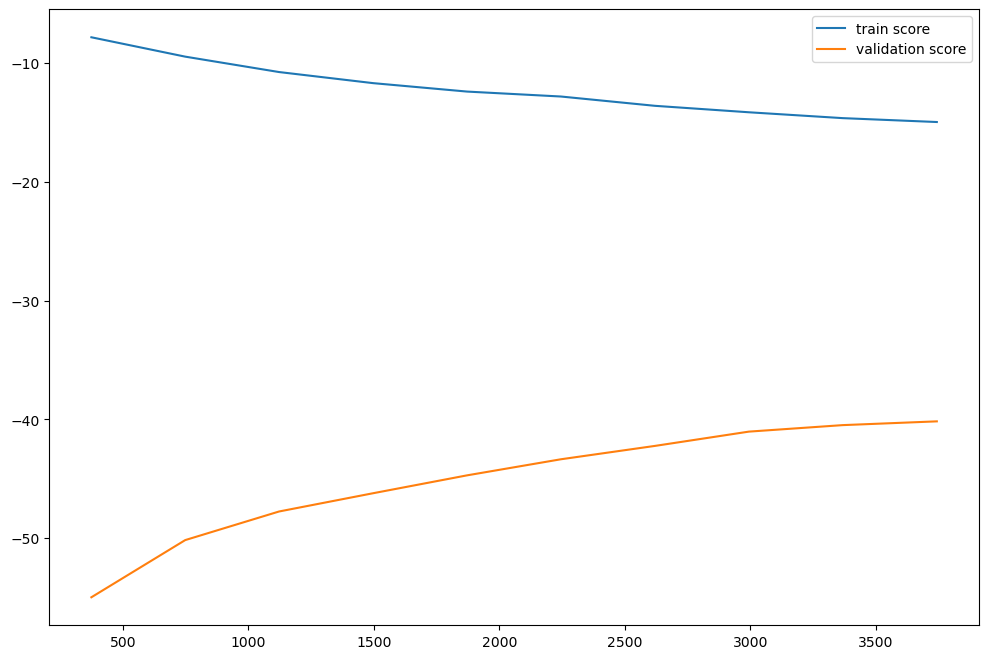

In [64]:
# IMPORT BIBLIOTHEQUE
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

# DATAFRAME df
X = pd.read_csv("../data/X_train_v2.csv", index_col=0, encoding = "ISO-8859-1")
X_WF1 = X[X['WF']=='WF1']
y = pd.read_csv('../data/Y_train_sl9m6Jh.csv', index_col=0, encoding = "ISO-8859-1")
X_WF1_indexes = X.index[X['WF']=='WF1']
y_WF1 = y.iloc[X_WF1_indexes-1] 
df = X_WF1.copy()
liste_U_columns = [df.columns[i] for i in range (df.shape[1]) if '_U' in df.columns[i]]
liste_V_columns = [df.columns[i] for i in range (df.shape[1]) if '_V' in df.columns[i]]
liste_T_columns = [df.columns[i] for i in range (df.shape[1]) if '_T' in df.columns[i]]
liste_CLCT_columns = [df.columns[i] for i in range (df.shape[1]) if '_CLCT' in df.columns[i]]
y_columns = ['Production']
df = df[liste_U_columns + liste_V_columns + liste_T_columns + liste_CLCT_columns]
df['Production'] = y_WF1

#Creation de la variable WindSpeed WS
WS = pd.DataFrame()
dico = dict(zip(liste_V_columns,liste_U_columns))
for key, value in dico.items():
    WS[key] = np.sqrt(df[key]**2+df[value]**2)
liste_WS_columns=[]
for elem in list(WS.columns):
    new_elem = elem.replace("_V","_WS")
    liste_WS_columns.append(new_elem)
WS.columns = liste_WS_columns

#Creation de la variable WindDir WD
WD = pd.DataFrame()
dico = dict(zip(liste_V_columns,liste_U_columns))
for key, value in dico.items():
    WD[key] = (270-np.arctan2(df[value],df[key])*180/np.pi)%360 

liste_WD_columns=[]
for elem in list(WD.columns):
    new_elem = elem.replace("_V","_WD")
    liste_WD_columns.append(new_elem)
WD.columns = liste_WD_columns

#FONCTIONS DE PREPROCESSING
def imputation(df):
    df = df.fillna(df.median())
    return  df
def feature_engineering(df):
    df = df.drop(liste_U_columns, axis=1)
    df = df.drop(liste_V_columns, axis=1)
    df[liste_WS_columns] = WS
    df[liste_WD_columns] = WD
    df = df[df.columns[df.isna().sum()/df.shape[0] <0.9]]
    return df
feature_engineering(df)
def preprocessing(df):
    df = feature_engineering(df)
    df = imputation(df)
    X = df.drop('Production', axis=1)
    y = df['Production']
    return X, y

#TRAIN&TEST SET
from sklearn.model_selection import train_test_split
trainset, testset = train_test_split(df, test_size=0.2, random_state=0)
X_train, y_train = preprocessing(trainset)
X_test, y_test = preprocessing(testset)


#IMPORT SKLEARN
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from CAPE_CNR_metric import CAPE_CNR_function
from sklearn.metrics import make_scorer
custom_score = make_scorer (CAPE_CNR_function, greater_is_better=False)
from sklearn.model_selection import learning_curve
from sklearn.model_selection import cross_val_score


def evaluation(model):
    model.fit(X_train, y_train)
    ypred = model.predict(X_test)
    N, train_score, val_score = learning_curve(model, X_train, y_train,
                                              cv=4, scoring=custom_score,
                                               train_sizes=np.linspace(0.1, 1, 10))
    print(model)
    plt.figure(figsize=(12, 8))
    plt.plot(N, train_score.mean(axis=1), label='train score')
    plt.plot(N, val_score.mean(axis=1), label='validation score')
    plt.legend()

#CREATION DU MODELE
model = make_pipeline(StandardScaler(),SVR(C=200.96393567776602, gamma = 0.006413977468342062))
model.fit(X_train, y_train)
ypred = model.predict(X_test)
print(CAPE_CNR_function(y_test,ypred))

evaluation(model)

37.54938457791132
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svr', SVR(C=1, gamma=0.01))])


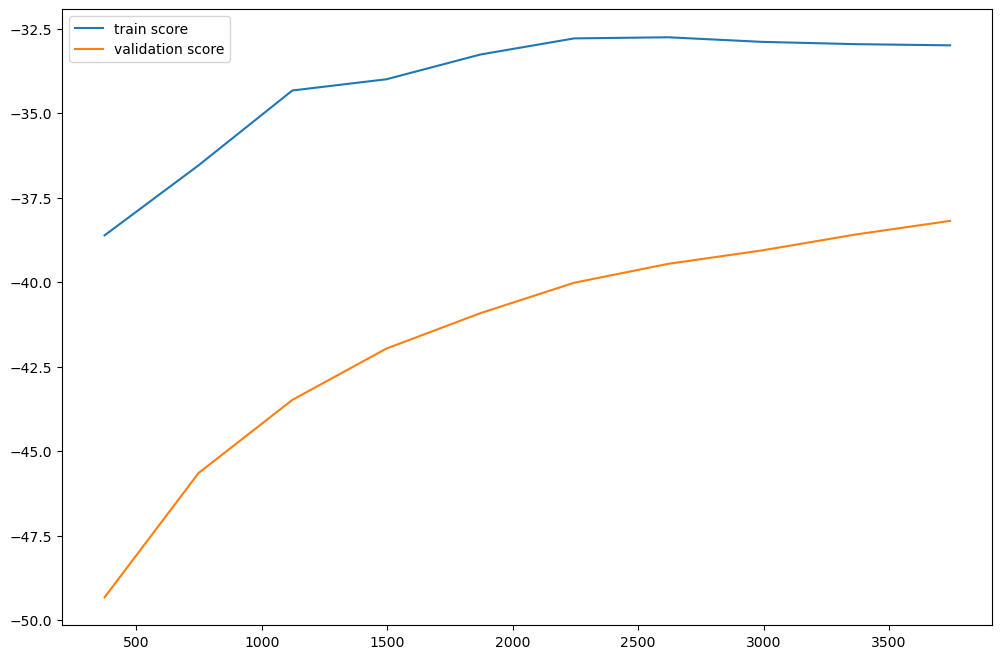

In [65]:
# IMPORT BIBLIOTHEQUE
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

# DATAFRAME df
X = pd.read_csv("../data/X_train_v2.csv", index_col=0, encoding = "ISO-8859-1")
X_WF1 = X[X['WF']=='WF1']
y = pd.read_csv('../data/Y_train_sl9m6Jh.csv', index_col=0, encoding = "ISO-8859-1")
X_WF1_indexes = X.index[X['WF']=='WF1']
y_WF1 = y.iloc[X_WF1_indexes-1] 
df = X_WF1.copy()
liste_U_columns = [df.columns[i] for i in range (df.shape[1]) if '_U' in df.columns[i]]
liste_V_columns = [df.columns[i] for i in range (df.shape[1]) if '_V' in df.columns[i]]
liste_T_columns = [df.columns[i] for i in range (df.shape[1]) if '_T' in df.columns[i]]
liste_CLCT_columns = [df.columns[i] for i in range (df.shape[1]) if '_CLCT' in df.columns[i]]
y_columns = ['Production']
df = df[liste_U_columns + liste_V_columns + liste_T_columns + liste_CLCT_columns]
df['Production'] = y_WF1

#Creation de la variable WindSpeed WS
WS = pd.DataFrame()
dico = dict(zip(liste_V_columns,liste_U_columns))
for key, value in dico.items():
    WS[key] = np.sqrt(df[key]**2+df[value]**2)
liste_WS_columns=[]
for elem in list(WS.columns):
    new_elem = elem.replace("_V","_WS")
    liste_WS_columns.append(new_elem)
WS.columns = liste_WS_columns

#Creation de la variable WindDir WD
WD = pd.DataFrame()
dico = dict(zip(liste_V_columns,liste_U_columns))
for key, value in dico.items():
    WD[key] = (270-np.arctan2(df[value],df[key])*180/np.pi)%360 

liste_WD_columns=[]
for elem in list(WD.columns):
    new_elem = elem.replace("_V","_WD")
    liste_WD_columns.append(new_elem)
WD.columns = liste_WD_columns

#FONCTIONS DE PREPROCESSING
def imputation(df):
    df = df.fillna(df.median())
    return  df
def feature_engineering(df):
    df = df.drop(liste_U_columns, axis=1)
    df = df.drop(liste_V_columns, axis=1)
    df[liste_WS_columns] = WS
    df[liste_WD_columns] = WD
    df = df[df.columns[df.isna().sum()/df.shape[0] <0.9]]
    return df
feature_engineering(df)
def preprocessing(df):
    df = feature_engineering(df)
    df = imputation(df)
    X = df.drop('Production', axis=1)
    y = df['Production']
    return X, y

#TRAIN&TEST SET
from sklearn.model_selection import train_test_split
trainset, testset = train_test_split(df, test_size=0.2, random_state=0)
X_train, y_train = preprocessing(trainset)
X_test, y_test = preprocessing(testset)


#IMPORT SKLEARN
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from CAPE_CNR_metric import CAPE_CNR_function
from sklearn.metrics import make_scorer
custom_score = make_scorer (CAPE_CNR_function, greater_is_better=False)
from sklearn.model_selection import learning_curve
from sklearn.model_selection import cross_val_score


def evaluation(model):
    model.fit(X_train, y_train)
    ypred = model.predict(X_test)
    N, train_score, val_score = learning_curve(model, X_train, y_train,
                                              cv=4, scoring=custom_score,
                                               train_sizes=np.linspace(0.1, 1, 10))
    print(model)
    plt.figure(figsize=(12, 8))
    plt.plot(N, train_score.mean(axis=1), label='train score')
    plt.plot(N, val_score.mean(axis=1), label='validation score')
    plt.legend()

#CREATION DU MODELE
model = make_pipeline(StandardScaler(),SVR(C=1, gamma = 0.01))
model.fit(X_train, y_train)
ypred = model.predict(X_test)
print(CAPE_CNR_function(y_test,ypred))

evaluation(model)

36.99932944174223
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svr', SVR(C=1, gamma=0.01))])


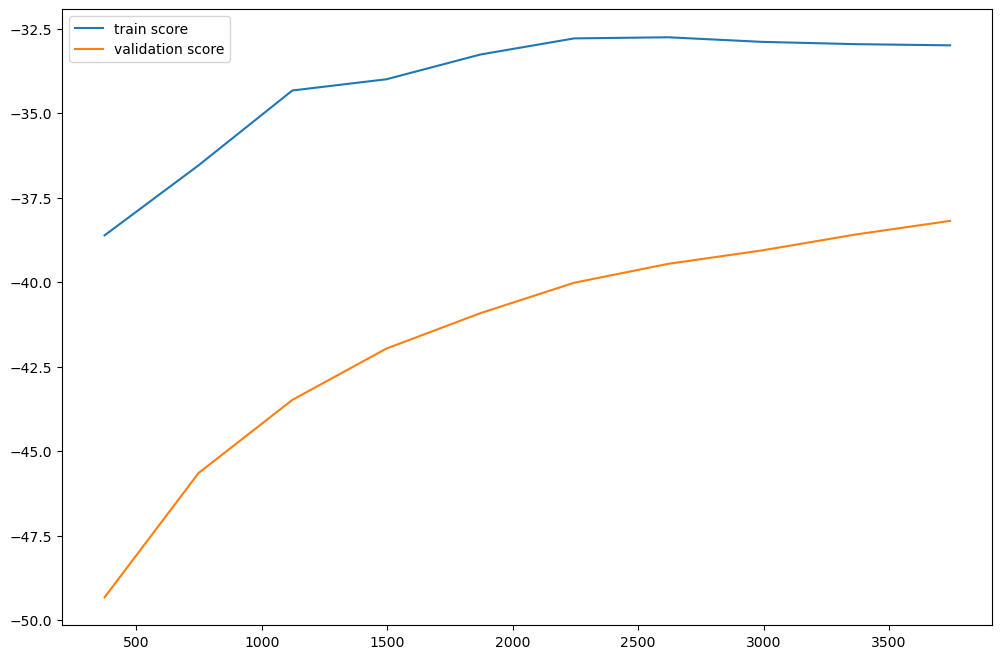

In [66]:
# IMPORT BIBLIOTHEQUE
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

# DATAFRAME df
X = pd.read_csv("../data/X_train_v2.csv", index_col=0, encoding = "ISO-8859-1")
X_WF1 = X[X['WF']=='WF1']
y = pd.read_csv('../data/Y_train_sl9m6Jh.csv', index_col=0, encoding = "ISO-8859-1")
X_WF1_indexes = X.index[X['WF']=='WF1']
y_WF1 = y.iloc[X_WF1_indexes-1] 
df = X_WF1.copy()
liste_U_columns = [df.columns[i] for i in range (df.shape[1]) if '_U' in df.columns[i]]
liste_V_columns = [df.columns[i] for i in range (df.shape[1]) if '_V' in df.columns[i]]
liste_T_columns = [df.columns[i] for i in range (df.shape[1]) if '_T' in df.columns[i]]
liste_CLCT_columns = [df.columns[i] for i in range (df.shape[1]) if '_CLCT' in df.columns[i]]
y_columns = ['Production']
df = df[liste_U_columns + liste_V_columns + liste_T_columns + liste_CLCT_columns]
df['Production'] = y_WF1

#Creation de la variable WindSpeed WS
WS = pd.DataFrame()
dico = dict(zip(liste_V_columns,liste_U_columns))
for key, value in dico.items():
    WS[key] = np.sqrt(df[key]**2+df[value]**2)
liste_WS_columns=[]
for elem in list(WS.columns):
    new_elem = elem.replace("_V","_WS")
    liste_WS_columns.append(new_elem)
WS.columns = liste_WS_columns

#Creation de la variable WindDir WD
WD = pd.DataFrame()
dico = dict(zip(liste_V_columns,liste_U_columns))
for key, value in dico.items():
    WD[key] = (270-np.arctan2(df[value],df[key])*180/np.pi)%360 

liste_WD_columns=[]
for elem in list(WD.columns):
    new_elem = elem.replace("_V","_WD")
    liste_WD_columns.append(new_elem)
WD.columns = liste_WD_columns

#FONCTIONS DE PREPROCESSING
def imputation(df):
    df = df.fillna(df.median())
    return  df
def feature_engineering(df):
    df = df.drop(liste_U_columns, axis=1)
    df = df.drop(liste_V_columns, axis=1)
    df[liste_WS_columns] = WS
    df[liste_WD_columns] = WD
    df = df[df.columns[df.isna().sum()/df.shape[0] <0.9]]
    return df
feature_engineering(df)
def preprocessing(df):
    df = feature_engineering(df)
    df = imputation(df)
    X = df.drop('Production', axis=1)
    y = df['Production']
    return X, y

#TRAIN&TEST SET
from sklearn.model_selection import train_test_split
trainset, testset = train_test_split(df, test_size=0.2, random_state=0)
X_train, y_train = preprocessing(trainset)
X_test, y_test = preprocessing(testset)


#IMPORT SKLEARN
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from CAPE_CNR_metric import CAPE_CNR_function
from sklearn.metrics import make_scorer
custom_score = make_scorer (CAPE_CNR_function, greater_is_better=False)
from sklearn.model_selection import learning_curve
from sklearn.model_selection import cross_val_score


def evaluation(model):
    model.fit(X_train, y_train)
    ypred = model.predict(X_test)
    N, train_score, val_score = learning_curve(model, X_train, y_train,
                                              cv=4, scoring=custom_score,
                                               train_sizes=np.linspace(0.1, 1, 10))
    print(model)
    plt.figure(figsize=(12, 8))
    plt.plot(N, train_score.mean(axis=1), label='train score')
    plt.plot(N, val_score.mean(axis=1), label='validation score')
    plt.legend()

#CREATION DU MODELE
model1 = make_pipeline(StandardScaler(),SVR(C=10, gamma = 0.01))
model1.fit(X_train, y_train)
ypred1 = model1.predict(X_test)
print(CAPE_CNR_function(y_test,ypred1))

evaluation(model)

In [70]:
# IMPORT BIBLIOTHEQUE
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

# DATAFRAME df
df = pd.read_csv("../data/X_train_v2.csv", index_col=0, encoding = "ISO-8859-1")
X = pd.read_csv("../data/X_test_v2.csv", index_col=0, encoding = "ISO-8859-1")
Y =  pd.read_csv("../data/Y_train_sl9m6Jh.csv", index_col=0, encoding = "ISO-8859-1")

liste_U_columns = [df.columns[i] for i in range (df.shape[1]) if '_U' in df.columns[i]]
liste_V_columns = [df.columns[i] for i in range (df.shape[1]) if '_V' in df.columns[i]]
liste_T_columns = [df.columns[i] for i in range (df.shape[1]) if '_T' in df.columns[i]]
liste_CLCT_columns = [df.columns[i] for i in range (df.shape[1]) if '_CLCT' in df.columns[i]]

#Creation de la variable WindSpeed WS
WS = pd.DataFrame()
dico = dict(zip(liste_V_columns,liste_U_columns))
for key, value in dico.items():
    WS[key] = np.sqrt(df[key]**2+df[value]**2)
liste_WS_columns=[]
for elem in list(WS.columns):
    new_elem = elem.replace("_V","_WS")
    liste_WS_columns.append(new_elem)
WS.columns = liste_WS_columns
#Creation de la variable WindDir WD
WD = pd.DataFrame()
dico = dict(zip(liste_V_columns,liste_U_columns))
for key, value in dico.items():
    WD[key] = (270-np.arctan2(df[value],df[key])*180/np.pi)%360 
liste_WD_columns=[]
for elem in list(WD.columns):
    new_elem = elem.replace("_V","_WD")
    liste_WD_columns.append(new_elem)
WD.columns = liste_WD_columns

#Creation de la variable WindSpeed WS
WS_t = pd.DataFrame()
dico = dict(zip(liste_V_columns,liste_U_columns))
for key, value in dico.items():
    WS_t[key] = np.sqrt(X[key]**2+X[value]**2)
liste_WS_columns=[]
for elem in list(WS_t.columns):
    new_elem = elem.replace("_V","_WS")
    liste_WS_columns.append(new_elem)
WS_t.columns = liste_WS_columns
#Creation de la variable WindDir WD
WD_t = pd.DataFrame()
dico = dict(zip(liste_V_columns,liste_U_columns))
for key, value in dico.items():
    WD_t[key] = (270-np.arctan2(X[value],X[key])*180/np.pi)%360 
liste_WD_columns=[]
for elem in list(WD_t.columns):
    new_elem = elem.replace("_V","_WD")
    liste_WD_columns.append(new_elem)
WD_t.columns = liste_WD_columns

df_new =pd.DataFrame()
df_new['Production'] = Y
df_new[liste_WS_columns] = WS
df_new[liste_WD_columns] = WD
df_new[liste_CLCT_columns] = df[liste_CLCT_columns]
df_new[liste_T_columns] = df[liste_T_columns]
df_new['Time']= df['Time']
df_new['WF']= df['WF']
df_new = df_new.fillna(0)

X_new = pd.DataFrame()
X_new[liste_WS_columns]= WS_t
X_new[liste_WD_columns]= WD_t
X_new[liste_CLCT_columns] = X[liste_CLCT_columns]
X_new[liste_T_columns] = X[liste_T_columns]
X_new['WF']= X['WF']
X_new = X_new.fillna(0)

def imputation(df):
    df = df.fillna(df.median())
    return  df
def feature_engineering(df):
    return df
    
def preprocessing(df):
    df = feature_engineering(df)
    df = imputation(df)
    df = df.drop('Time', axis = 1)
    df = df[df['WF']=='WF1']
    df= df.drop('WF', axis = 1)
    Y = df['Production']
    df = df.drop('Production', axis=1)
    return df, Y
df_WF1, Y_WF1 = preprocessing(df_new)

def preprocessing(df):
    df = feature_engineering(df)
    df = imputation(df)
    df = df.drop('Time', axis = 1)
    df = df[df['WF']=='WF2']
    df= df.drop('WF', axis = 1)
    Y = df['Production']
    df = df.drop('Production', axis=1)
    return df, Y
df_WF2, Y_WF2 = preprocessing(df_new)

def preprocessing(df):
    df = feature_engineering(df)
    df = imputation(df)
    df = df.drop('Time', axis = 1)
    df = df[df['WF']=='WF3']
    df= df.drop('WF', axis = 1)
    Y = df['Production']
    df = df.drop('Production', axis=1)
    return df, Y
df_WF3, Y_WF3 = preprocessing(df_new)

def preprocessing(df):
    df = feature_engineering(df)
    df = imputation(df)
    df = df.drop('Time', axis = 1)
    df = df[df['WF']=='WF4']
    df= df.drop('WF', axis = 1)
    Y = df['Production']
    df = df.drop('Production', axis=1)
    return df, Y
df_WF4, Y_WF4 = preprocessing(df_new)

def preprocessing(df):
    df = feature_engineering(df)
    df = imputation(df)
    df = df.drop('Time', axis = 1)
    df = df[df['WF']=='WF5']
    df= df.drop('WF', axis = 1)
    Y = df['Production']
    df = df.drop('Production', axis=1)
    return df, Y
df_WF5, Y_WF5 = preprocessing(df_new)

def preprocessing(df):
    df = feature_engineering(df)
    df = imputation(df)
    df = df.drop('Time', axis = 1)
    df = df[df['WF']=='WF6']
    df= df.drop('WF', axis = 1)
    Y = df['Production']
    df = df.drop('Production', axis=1)
    return df, Y
df_WF6, Y_WF6 = preprocessing(df_new)

X1 = X_new[X_new['WF']=='WF1']
X1 = X1.drop('WF', axis=1)

X2 = X_new[X_new['WF']=='WF2']
X2 = X2.drop('WF', axis=1)

X3 = X_new[X_new['WF']=='WF3']
X3 = X3.drop('WF', axis=1)

X4 = X_new[X_new['WF']=='WF4']
X4 = X4.drop('WF', axis=1)

X5 = X_new[X_new['WF']=='WF5']
X5= X5.drop('WF', axis=1)

X6 = X_new[X_new['WF']=='WF6']
X6 = X6.drop('WF', axis=1)

#IMPORT SKLEARN
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from CAPE_CNR_metric import CAPE_CNR_function
from sklearn.metrics import make_scorer
custom_score = make_scorer (CAPE_CNR_function, greater_is_better=False)

#CREATION DU MODELE
model1 = make_pipeline(StandardScaler(),LinearRegression())
model1.fit(df_WF1,Y_WF1)

model2 = make_pipeline(StandardScaler(),LinearRegression())
model2.fit(df_WF2,Y_WF2)

model3 = make_pipeline(StandardScaler(),LinearRegression())
model3.fit(df_WF3,Y_WF3)

model4 = make_pipeline(StandardScaler(),LinearRegression())
model4.fit(df_WF4,Y_WF4)

model5 = make_pipeline(StandardScaler(),LinearRegression())
model5.fit(df_WF5,Y_WF5)

model6 = make_pipeline(StandardScaler(),LinearRegression())
model6.fit(df_WF6,Y_WF6)

ypred1 = model1.predict(X1)
ypred2 = model1.predict(X2)
ypred3 = model1.predict(X3)
ypred4 = model1.predict(X4)
ypred5 = model1.predict(X5)
ypred6 = model1.predict(X6)

y = np.concatenate([ypred1, ypred2, ypred3, ypred4, ypred5, ypred6], axis=0)
mony_test0= pd.DataFrame({"Production": y})
yrand = pd.read_csv("../data/Y_test_random.csv", index_col=0, encoding = "ISO-8859-1")
mony_test0 = mony_test0.set_index(yrand.index)
mony_test0.to_csv("../data/production_RL.csv", index=True)

/var/folders/j1/7qnbs1wj3p3_8x_mtqwtgtlh0000gn/T/ipykernel_6436/1839806355.py:65: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_new[liste_T_columns] = df[liste_T_columns]
/var/folders/j1/7qnbs1wj3p3_8x_mtqwtgtlh0000gn/T/ipykernel_6436/1839806355.py:65: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_new[liste_T_columns] = df[liste_T_columns]
/var/folders/j1/7qnbs1wj3p3_8x_mtqwtgtlh0000gn/T/ipykernel_6436/1839806355.py:65: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert

In [69]:
# IMPORT BIBLIOTHEQUE
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

# DATAFRAME df
df = pd.read_csv("../data/X_train_v2.csv", index_col=0, encoding = "ISO-8859-1")
X = pd.read_csv("../data/X_test_v2.csv", index_col=0, encoding = "ISO-8859-1")
Y =  pd.read_csv("../data/Y_train_sl9m6Jh.csv", index_col=0, encoding = "ISO-8859-1")

liste_U_columns = [df.columns[i] for i in range (df.shape[1]) if '_U' in df.columns[i]]
liste_V_columns = [df.columns[i] for i in range (df.shape[1]) if '_V' in df.columns[i]]
liste_T_columns = [df.columns[i] for i in range (df.shape[1]) if '_T' in df.columns[i]]
liste_CLCT_columns = [df.columns[i] for i in range (df.shape[1]) if '_CLCT' in df.columns[i]]

#Creation de la variable WindSpeed WS
WS = pd.DataFrame()
dico = dict(zip(liste_V_columns,liste_U_columns))
for key, value in dico.items():
    WS[key] = np.sqrt(df[key]**2+df[value]**2)
liste_WS_columns=[]
for elem in list(WS.columns):
    new_elem = elem.replace("_V","_WS")
    liste_WS_columns.append(new_elem)
WS.columns = liste_WS_columns
#Creation de la variable WindDir WD
WD = pd.DataFrame()
dico = dict(zip(liste_V_columns,liste_U_columns))
for key, value in dico.items():
    WD[key] = (270-np.arctan2(df[value],df[key])*180/np.pi)%360 
liste_WD_columns=[]
for elem in list(WD.columns):
    new_elem = elem.replace("_V","_WD")
    liste_WD_columns.append(new_elem)
WD.columns = liste_WD_columns

#Creation de la variable WindSpeed WS
WS_t = pd.DataFrame()
dico = dict(zip(liste_V_columns,liste_U_columns))
for key, value in dico.items():
    WS_t[key] = np.sqrt(X[key]**2+X[value]**2)
liste_WS_columns=[]
for elem in list(WS_t.columns):
    new_elem = elem.replace("_V","_WS")
    liste_WS_columns.append(new_elem)
WS_t.columns = liste_WS_columns
#Creation de la variable WindDir WD
WD_t = pd.DataFrame()
dico = dict(zip(liste_V_columns,liste_U_columns))
for key, value in dico.items():
    WD_t[key] = (270-np.arctan2(X[value],X[key])*180/np.pi)%360 
liste_WD_columns=[]
for elem in list(WD_t.columns):
    new_elem = elem.replace("_V","_WD")
    liste_WD_columns.append(new_elem)
WD_t.columns = liste_WD_columns

df_new =pd.DataFrame()
df_new['Production'] = Y
df_new[liste_WS_columns] = WS
df_new[liste_WD_columns] = WD
df_new[liste_CLCT_columns] = df[liste_CLCT_columns]
df_new[liste_T_columns] = df[liste_T_columns]
df_new['Time']= df['Time']
df_new['WF']= df['WF']
df_new = df_new.fillna(0)

X_new = pd.DataFrame()
X_new[liste_WS_columns]= WS_t
X_new[liste_WD_columns]= WD_t
X_new[liste_CLCT_columns] = X[liste_CLCT_columns]
X_new[liste_T_columns] = X[liste_T_columns]
X_new['WF']= X['WF']
X_new = X_new.fillna(0)
X_new.shape

def imputation(df):
    df = df.fillna(df.median())
    return  df
def feature_engineering(df):
    return df

def preprocessing(df):
    df = feature_engineering(df)
    df = imputation(df)
    df = df.drop('Time', axis = 1)
    df = df[df['WF']=='WF1']
    df= df.drop('WF', axis = 1)
    Y = df['Production']
    df = df.drop('Production', axis=1)
    return df, Y
df_WF1, Y_WF1 = preprocessing(df_new)

def preprocessing(df):
    df = feature_engineering(df)
    df = imputation(df)
    df = df.drop('Time', axis = 1)
    df = df[df['WF']=='WF2']
    df= df.drop('WF', axis = 1)
    Y = df['Production']
    df = df.drop('Production', axis=1)
    return df, Y
df_WF2, Y_WF2 = preprocessing(df_new)

def preprocessing(df):
    df = feature_engineering(df)
    df = imputation(df)
    df = df.drop('Time', axis = 1)
    df = df[df['WF']=='WF3']
    df= df.drop('WF', axis = 1)
    Y = df['Production']
    df = df.drop('Production', axis=1)
    return df, Y
df_WF3, Y_WF3 = preprocessing(df_new)

def preprocessing(df):
    df = feature_engineering(df)
    df = imputation(df)
    df = df.drop('Time', axis = 1)
    df = df[df['WF']=='WF4']
    df= df.drop('WF', axis = 1)
    Y = df['Production']
    df = df.drop('Production', axis=1)
    return df, Y
df_WF4, Y_WF4 = preprocessing(df_new)

def preprocessing(df):
    df = feature_engineering(df)
    df = imputation(df)
    df = df.drop('Time', axis = 1)
    df = df[df['WF']=='WF5']
    df= df.drop('WF', axis = 1)
    Y = df['Production']
    df = df.drop('Production', axis=1)
    return df, Y
df_WF5, Y_WF5 = preprocessing(df_new)

def preprocessing(df):
    df = feature_engineering(df)
    df = imputation(df)
    df = df.drop('Time', axis = 1)
    df = df[df['WF']=='WF6']
    df= df.drop('WF', axis = 1)
    Y = df['Production']
    df = df.drop('Production', axis=1)
    return df, Y
df_WF6, Y_WF6 = preprocessing(df_new)

X1 = X_new[X_new['WF']=='WF1']
X1 = X1.drop('WF', axis=1)

X2 = X_new[X_new['WF']=='WF2']
X2 = X2.drop('WF', axis=1)

X3 = X_new[X_new['WF']=='WF3']
X3 = X3.drop('WF', axis=1)

X4 = X_new[X_new['WF']=='WF4']
X4 = X4.drop('WF', axis=1)

X5 = X_new[X_new['WF']=='WF5']
X5= X5.drop('WF', axis=1)

X6 = X_new[X_new['WF']=='WF6']
X6 = X6.drop('WF', axis=1)

#IMPORT SKLEARN
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from CAPE_CNR_metric import CAPE_CNR_function
from sklearn.metrics import make_scorer
custom_score = make_scorer (CAPE_CNR_function, greater_is_better=False)

#CREATION DU MODELE
model1 = make_pipeline(StandardScaler(),SVR(C=10, gamma = 0.01))
model1.fit(df_WF1,Y_WF1)

model2 = make_pipeline(StandardScaler(),SVR(C=10, gamma = 0.01))
model2.fit(df_WF2,Y_WF2)

model3 = make_pipeline(StandardScaler(),SVR(C=10, gamma = 0.01))
model3.fit(df_WF3,Y_WF3)

model4 = make_pipeline(StandardScaler(),SVR(C=10, gamma = 0.01))
model4.fit(df_WF4,Y_WF4)

model5 = make_pipeline(StandardScaler(),SVR(C=10, gamma = 0.01))
model5.fit(df_WF5,Y_WF5)

model6 = make_pipeline(StandardScaler(),SVR(C=10, gamma = 0.01))
model6.fit(df_WF6,Y_WF6)

ypred1 = model1.predict(X1)
ypred2 = model1.predict(X2)
ypred3 = model1.predict(X3)
ypred4 = model1.predict(X4)
ypred5 = model1.predict(X5)
ypred6 = model1.predict(X6)

y = np.concatenate([ypred1, ypred2, ypred3, ypred4, ypred5, ypred6], axis=0)
mony_test0= pd.DataFrame({"Production": y})
yrand = pd.read_csv("../data/Y_test_random.csv", index_col=0, encoding = "ISO-8859-1")
mony_test0 = mony_test0.set_index(yrand.index)
mony_test0.to_csv("../data/production_SVR.csv", index=True)

/var/folders/j1/7qnbs1wj3p3_8x_mtqwtgtlh0000gn/T/ipykernel_6436/1016152371.py:65: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_new[liste_T_columns] = df[liste_T_columns]
/var/folders/j1/7qnbs1wj3p3_8x_mtqwtgtlh0000gn/T/ipykernel_6436/1016152371.py:65: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_new[liste_T_columns] = df[liste_T_columns]
/var/folders/j1/7qnbs1wj3p3_8x_mtqwtgtlh0000gn/T/ipykernel_6436/1016152371.py:65: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert

FileNotFoundError: [Errno 2] No such file or directory: 'Y_test_random.csv'